In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from ipywidgets import interact
from utils import plot_slice, plot_label

from dataLoad import data_load_numpy, data_load_tensors, get_dataloaders
from UNET_2D import UNet2D


/Users/rasmus/Desktop/Bachelor_projekt/Bachelor_projekt_git/Segmentation-of-focused-ion-beam-tomography-image-data-/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [11]:
BATCH_SIZE = 15
TRAIN_SIZE = 0.8
SQUARE_SIZE = 256
EPOCHS = 11
N_NEURONS = 64
LEARNING_RATE = 0.001
PATIENCE = 5
N_DEPTH = 3

IN_MEMORY = False
STATIC_TEST = True
WITH_SKIP_CONNECTIONS = True

train_loader, test_loader = get_dataloaders(batch_size=BATCH_SIZE, train_size=TRAIN_SIZE, in_memory=IN_MEMORY, static_test=STATIC_TEST)

model = UNet2D(n_neurons=N_NEURONS,
                n_channels=2,
                n_classes=3,
                n_depth=N_DEPTH,
                with_skip_connections=WITH_SKIP_CONNECTIONS)


Loading data...

Processing data...

Data processed.

Using MPS


In [19]:
modelName = "best_model.pth"
state_dict = torch.load(f"saved_models/{modelName}", map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

<All keys matched successfully>

In [20]:
X, Y = data_load_tensors(square_size=SQUARE_SIZE)



Loading data...

Processing data...

Data processed.



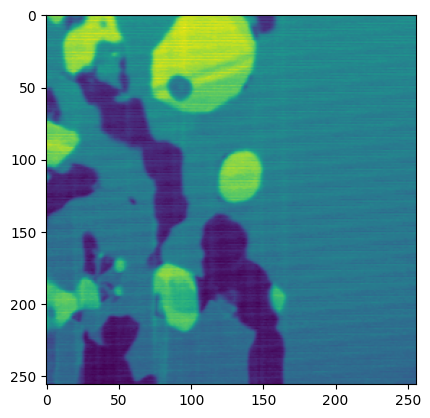

In [19]:
xraw_1 = X[n_slice][0].numpy()
xraw_2 = X[n_slice][1].numpy()

plt.imshow(xraw_1)


# Code to plot prediction and mask of a slice

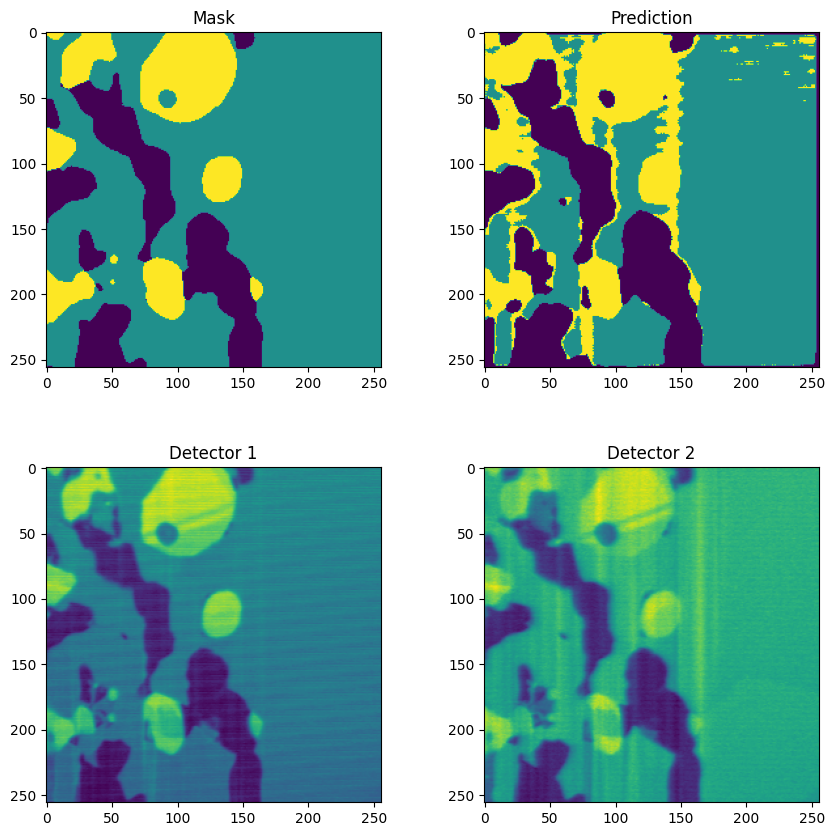

In [25]:

n_slice = 3500

x, y = X[n_slice].unsqueeze(0), Y[n_slice].unsqueeze(0)
x, y = x.to(model.device), y.to(model.device)
model.to(model.device)
y_pred = model.to_segmentation(x)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Create a figure and a 2x2 subplot grid

# Add space between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3) 

# Plot the Mask
y_pred_plot1 = y.squeeze(0).cpu().numpy()
axs[0, 0].imshow(y_pred_plot1)
axs[0, 0].set_title('Mask')

# Plot the prediction
y_pred_plot2 = y_pred.squeeze(0).cpu().numpy()  # Replace this with your second image
axs[0, 1].imshow(y_pred_plot2)
axs[0, 1].set_title('Prediction')

# Plot the detector 1
xraw_1 = X[n_slice][0].cpu().numpy()
axs[1, 0].imshow(xraw_1)
axs[1, 0].set_title('Detector 1')

# Plot the detector 2
xraw_2 = X[n_slice][1].cpu().numpy()
axs[1, 1].imshow(xraw_2)
axs[1, 1].set_title('Detector 2')

plt.savefig(f"plots/predictionVsMask_slice{n_slice}.png")
plt.show()


# y_pred_plot = y_pred.squeeze(0).cpu().numpy()
# plt.imshow(y_pred_plot)
# plt.show()

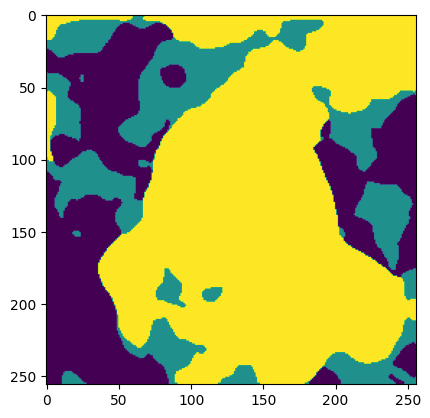

In [62]:
y_true_plot = y.squeeze(0).cpu().numpy()
plt.imshow(y_pred_plot)
plt.show()

In [7]:
X, y = data_load_numpy(processing=True)

# X = X/255
X.shape


Loading data...

Processing data...

Data processed.



(645, 2, 544, 897)

In [4]:
mu_X1 = X[:,0,:,:].mean()
mu_X2 = X[:,1,:,:].mean()

sd_X1 = X[:,0,:,:].std()
sd_X2 = X[:,1,:,:].std()

print("Average for detector 1: ", mu_X1)
print("Average for detector 2: ", mu_X2)

print("Standard deviation for detector 1: ", sd_X1)
print("Standard deviation for detector 2: ", sd_X2)

Average for detector 1:  0.4626172570265656
Average for detector 2:  0.521423973598952
Standard deviation for detector 1:  0.15913137578173225
Standard deviation for detector 2:  0.32835114830370293


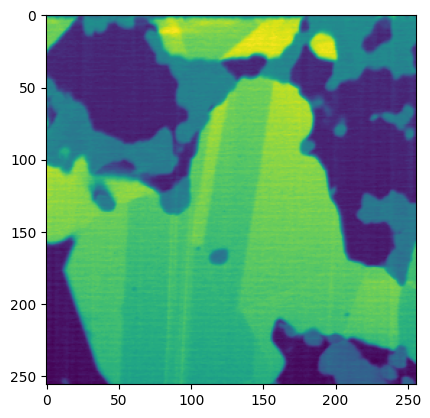

In [11]:
plot_slice(X,0,0)

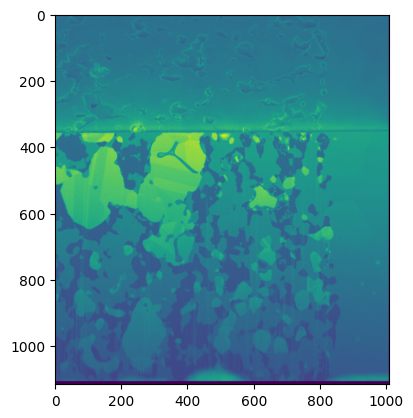

In [18]:
plot_slice(X_original,0,0)

(544, 897)

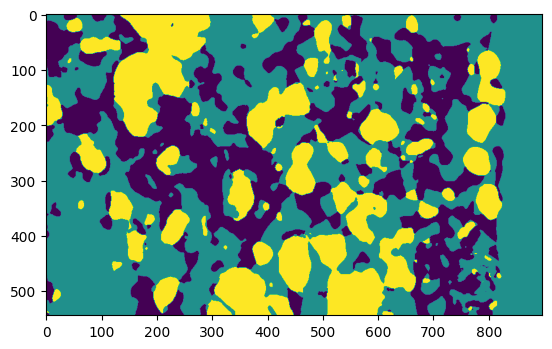

In [22]:
plot_label(y_original, 100)

In [8]:
testList = [1,2,3,4,5,6,7,8,9,10]

for i in range(len(testList)):
    print("Test list element: ", testList[-i-2])

Test list element:  9
Test list element:  8
Test list element:  7
Test list element:  6
Test list element:  5
Test list element:  4
Test list element:  3
Test list element:  2
Test list element:  1


IndexError: list index out of range

In [1]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [ ]:
interact(plot_slice, i=(0, X[0].shape[0]-1))